# Data Importing

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


TensorFlow version: 2.8.1
Num GPUs Available:  1


In [ ]:
import numpy as np
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, ProgbarLogger
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l2

# Sample neural network model for demonstration
model = tf.keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Import The required Python libraries.
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from skimage import io, transform
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, EarlyStopping,CSVLogger,ProgbarLogger
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D, BatchNormalization
from keras.regularizers import l2


**Changable_Parameter**

In [ ]:
#here image size is 256x256
IMAGE_SIZE = 150
#every time process 32 images (61x31)~1951
BATCH_SIZE = 32
#how many color have in these pictures
CHANNELS = 3
#80x25~1951
EPOCHS = 80
NUM_CLASSES = 2
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
patience=20
data_dir ="E:\\teaLEafWork\\Tea leaf 🌿-20240418T082847Z-001\\Tea leaf 🌿"

model_name="DenseNet121"

In [ ]:
import tensorflow as tf


# Define image parameters
img_height = IMAGE_SIZE
img_width = img_height
batch_size = BATCH_SIZE

# Define data augmentation parameters
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% of the data for validation
    rotation_range=60,  # Rotate images randomly up to 60 degrees 
    zoom_range=0.2,  # Zoom range [1-zoom_range, 1+zoom_range]
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,  # Flip images horizontally
    vertical_flip=True,  # Flip images vertically 
    fill_mode='nearest'  # Strategy used for filling in newly created pixels
)


train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  
    subset='training' 
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  
    subset='validation'  
)


Found 753 images belonging to 2 classes.
Found 187 images belonging to 2 classes.


In [ ]:
images, labels = next(train_generator)

# Plot four random images from the batch
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
for i in range(4):
    # Generate a random index
    random_index = np.random.randint(0, BATCH_SIZE)

    # Plot the image
    axes[i].imshow(images[random_index])

    # Get the corresponding label
    label = labels[random_index]

    # Set the title as the class name
    class_name = train_generator.class_indices
    axes[i].set_title(list(class_name.keys())[np.argmax(label)])

plt.show()

# Building model

In [ ]:
from tensorflow.keras.applications import EfficientNetV2B0,ResNet50,InceptionV3,NASNetMobile,EfficientNetV2L,DenseNet121

model= DenseNet121(weights = 'imagenet',
                 include_top = False,
                 input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)
                 )

# Here we freeze the last 4 layers
for layer in model.layers:
    layer.trainable = False

# Let's print our layers
for (i,layer) in enumerate(model.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 ZeroPadding2D False
2 Conv2D False
3 BatchNormalization False
4 Activation False
5 ZeroPadding2D False
6 MaxPooling2D False
7 BatchNormalization False
8 Activation False
9 Conv2D False
10 BatchNormalization False
11 Activation False
12 Conv2D False
13 Concatenate False
14 BatchNormalization False
15 Activation False
16 Conv2D False
17 BatchNormalization False
18 Activation False
19 Conv2D False
20 Concatenate False
21 BatchNormalization False
22 Activation False
23 Conv2D False
24 BatchNormalization False
25 Activation False
26 Conv2D False
27 Concatenate False
28 BatchNormalization False
29 Activation False
30 Conv2D False
31 BatchNormalization False
32 Activation False
33 Conv2D False
34 Concatenate False
35 BatchNormalization False
36 Activation False
37 Conv2D False
38 BatchNormalization False
39 Activation False
40 Conv2D False
41 Concatenate False
42 BatchNormalization False
43 Activation False
44 Conv2D False
45 BatchNormalization False
46 Activation False
4

**Fine Tuning**

In [ ]:

def lw(bottom_model, num_classes):
    """creates the top or head of the model that will be
    placed on top of the bottom layers"""

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024, activation='relu')(top_model)  # L2 regularization
    top_model = Dropout(0.5)(top_model)
    top_model = Dense(num_classes, activation='softmax')(top_model)
    return top_model


In [ ]:
from keras.models import Model
FC_Head = lw(model, NUM_CLASSES)
model = Model(inputs = model.input, outputs = FC_Head)
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 156, 156, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 75, 75, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1/conv[0][0]']         

# Training

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler


def scheduler(epoch, lr):
     if epoch < 10:
         return lr
     else:
        return lr * np.exp(-0.1)

lr_scheduler = LearningRateScheduler(scheduler)

In [ ]:
if not os.path.exists("Results"):
    os.makedirs("Results")
if not os.path.exists("Model"):
    os.makedirs("Model")
csv_logger_path = os.path.join("Results", f"{model_name}_results.csv")
model_checkpoint_path = os.path.join("Model", f"{model_name}_Model.hdf5")

**CheckPoints**

In [ ]:

csv_logger = CSVLogger(csv_logger_path)
early_stopping = EarlyStopping(monitor='val_loss', patience=patience)
check = ModelCheckpoint(model_checkpoint_path, verbose=1, save_best_only=True)
progbar_logger = ProgbarLogger()

In [ ]:


model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model.fit(train_generator,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=validation_generator,
                    verbose = 1,
                    callbacks = [early_stopping,lr_scheduler,check,csv_logger],
                    initial_epoch=0)

Epoch 1/80
24/24 [==============================] - ETA: 0s - loss: 0.5319 - accuracy: 0.8260
Epoch 1: val_loss improved from inf to 0.12357, saving model to Model\DenseNet121_Model.hdf5
24/24 [==============================] - 74s 3s/step - loss: 0.5319 - accuracy: 0.8260 - val_loss: 0.1236 - val_accuracy: 0.9572 - lr: 0.0010
Epoch 2/80
24/24 [==============================] - ETA: 0s - loss: 0.2533 - accuracy: 0.9017
Epoch 2: val_loss did not improve from 0.12357
24/24 [==============================] - 37s 2s/step - loss: 0.2533 - accuracy: 0.9017 - val_loss: 0.1963 - val_accuracy: 0.9412 - lr: 0.0010
Epoch 3/80
24/24 [==============================] - ETA: 0s - loss: 0.1318 - accuracy: 0.9469
Epoch 3: val_loss improved from 0.12357 to 0.10296, saving model to Model\DenseNet121_Model.hdf5
24/24 [==============================] - 37s 2s/step - loss: 0.1318 - accuracy: 0.9469 - val_loss: 0.1030 - val_accuracy: 0.9465 - lr: 0.0010
Epoch 4/80
24/24 [==============================] - ETA

# Result

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

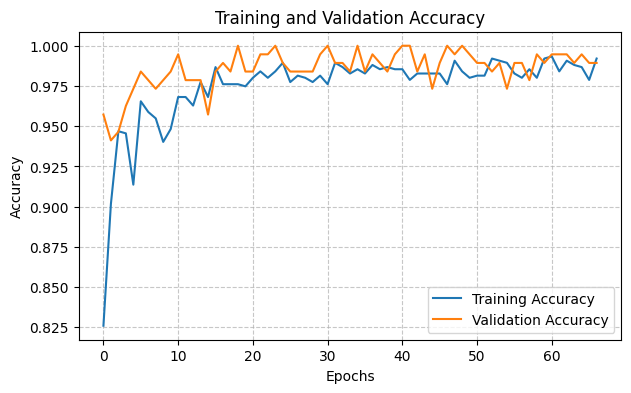

In [ ]:

plt.figure(figsize=(7, 4))
plt.plot((epochs ), history.history['accuracy'], label='Training Accuracy')
plt.plot((epochs ), history.history['val_accuracy'], label='Validation Accuracy')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

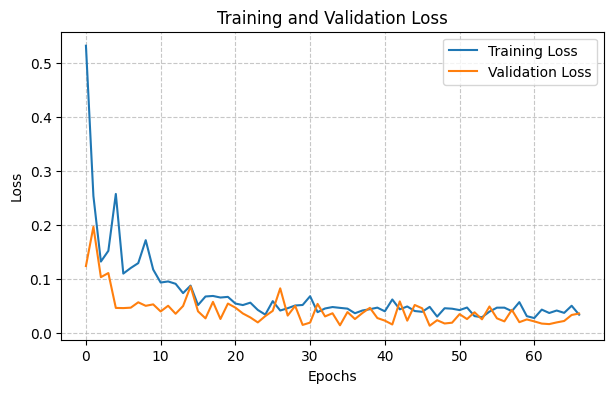

In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [ ]:
score = model.evaluate(validation_generator ,verbose=1)
print('Test Loss:', score[0])
print('Test accuracy:', score[1]*100)

6/6 [==============================] - 9s 1s/step - loss: 0.0269 - accuracy: 0.9947
Test Loss: 0.026898404583334923
Test accuracy: 99.46523904800415


In [ ]:
import numpy as np
from sklearn.metrics import classification_report


pred = model.predict(validation_generator)

# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(pred, axis=1)

# Get the true labels from the validation generator
true_labels = validation_generator.classes

# Get class labels
class_labels = list(validation_generator.class_indices.keys())

# Compute the classification report with zero_division parameter set to 'warn'
report = classification_report(true_labels, predicted_labels, target_names=class_labels, zero_division=1)

print("Classification Report:")
print(report)
